In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../ssd_data/final_data/final_data_MA2_after_deleted.csv',index_col=False)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')
data

,disk_id,ds,n_5,r_5,r_9,r_12,n_170,n_171,r_171,n_172,...,r_194,r_197,r_199,n_233,r_241,r_242,n_175,r_175,n_232,label
0,60008,2019-01-01,100.0,0.0,29039.0,14.0,100.0,100.0,0.0,100.0,...,31.0,0.0,41.0,79.0,6624921.0,13709359.0,100.0,7.430974e+11,100.0,0
2969,7471,2019-01-01,100.0,0.0,30261.0,11.0,100.0,100.0,0.0,100.0,...,26.0,0.0,0.0,90.0,3568771.0,49894.0,100.0,7.774267e+11,100.0,0
1704,86898,2019-01-01,100.0,0.0,24550.0,4.0,100.0,100.0,0.0,100.0,...,23.0,0.0,0.0,85.0,5771094.0,367011.0,100.0,6.314483e+11,100.0,0
5132,3548,2019-01-01,100.0,0.0,31401.0,25.0,100.0,100.0,0.0,100.0,...,26.0,0.0,0.0,83.0,4388154.0,9240921.0,100.0,7.865223e+11,100.0,0
923,44269,2019-01-01,100.0,0.0,30258.0,12.0,100.0,100.0,0.0,100.0,...,36.0,0.0,0.0,54.0,13986300.0,409670.0,100.0,7.694569e+11,100.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,28248,2019-06-30,100.0,0.0,35339.0,21.0,100.0,100.0,0.0,100.0,...,24.0,0.0,0.0,99.0,140298.0,5053724.0,100.0,9.063818e+11,100.0,0
6746,102803,2019-06-30,100.0,0.0,34859.0,12.0,100.0,100.0,0.0,100.0,...,25.0,0.0,0.0,90.0,3821657.0,975080.0,100.0,8.935509e+11,100.0,0
356,12288,2019-06-30,100.0,0.0,33341.0,15.0,100.0,100.0,0.0,100.0,...,26.0,0.0,43.0,99.0,324774.0,748025.0,100.0,8.549677e+11,100.0,0
2082,105783,2019-06-30,100.0,0.0,37338.0,14.0,100.0,100.0,0.0,100.0,...,23.0,0.0,0.0,96.0,548982.0,78414.0,100.0,9.539695e+11,100.0,0


In [3]:
# 70% 지점의 인덱스를 찾아 훈련 및 테스트 데이터로 분할
index_70_percent = int(len(data) * 0.7)
cutoff_date = data.iloc[index_70_percent]['ds']

# cutoff_date 이전의 데이터는 train_data로, 이후 데이터는 test_data로 분할
train_data = data[data['ds'] <= cutoff_date]
test_data = data[data['ds'] > cutoff_date]

In [4]:
cutoff_date

'2019-04-16'

In [5]:
X_train = train_data.drop(['disk_id','ds','label'],axis=1)
y_train = train_data['label']
X_test = test_data.drop(['disk_id','ds','label'],axis=1)
y_test = test_data['label']

In [6]:
X_train

,n_5,r_5,r_9,r_12,n_170,n_171,r_171,n_172,r_172,r_174,...,r_192,r_194,r_197,r_199,n_233,r_241,r_242,n_175,r_175,n_232
0,100.0,0.0,29039.0,14.0,100.0,100.0,0.0,100.0,0.0,12.0,...,12.0,31.0,0.0,41.0,79.0,6624921.0,13709359.0,100.0,7.430974e+11,100.0
2969,100.0,0.0,30261.0,11.0,100.0,100.0,0.0,100.0,0.0,8.0,...,8.0,26.0,0.0,0.0,90.0,3568771.0,49894.0,100.0,7.774267e+11,100.0
1704,100.0,0.0,24550.0,4.0,100.0,100.0,0.0,100.0,0.0,2.0,...,2.0,23.0,0.0,0.0,85.0,5771094.0,367011.0,100.0,6.314483e+11,100.0
5132,100.0,0.0,31401.0,25.0,100.0,100.0,0.0,100.0,0.0,15.0,...,15.0,26.0,0.0,0.0,83.0,4388154.0,9240921.0,100.0,7.865223e+11,100.0
923,100.0,0.0,30258.0,12.0,100.0,100.0,0.0,100.0,0.0,9.0,...,9.0,36.0,0.0,0.0,54.0,13986300.0,409670.0,100.0,7.694569e+11,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6322,100.0,0.0,27559.0,13.0,100.0,100.0,0.0,100.0,0.0,9.0,...,9.0,25.0,0.0,0.0,97.0,1047897.0,13034.0,100.0,7.005918e+11,100.0
5983,100.0,0.0,32298.0,13.0,100.0,100.0,0.0,100.0,0.0,4.0,...,4.0,24.0,0.0,0.0,98.0,788691.0,257690.0,100.0,8.252576e+11,100.0
574,100.0,0.0,34854.0,23.0,100.0,100.0,0.0,100.0,0.0,21.0,...,21.0,27.0,0.0,121.0,95.0,1087246.0,6121284.0,100.0,8.933719e+11,100.0
2271,100.0,0.0,31550.0,9.0,100.0,100.0,0.0,100.0,0.0,6.0,...,6.0,26.0,0.0,0.0,97.0,1081775.0,151264.0,100.0,8.079478e+11,100.0


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

y_pred = clf.predict(X_test_scaled)
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")
print(f"f1_score : {f1_score(y_test, y_pred,average='macro')}")
print(f"Precision : {precision_score(y_test, y_pred)}")
print(f"Recall : {recall_score(y_test, y_pred)}")

Accuracy : 0.950920245398773
f1_score : 0.5746556729047001
Precision : 0.7857142857142857
Recall : 0.09821428571428571


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

print(cm)

[[2004    3]
 [ 101   11]]


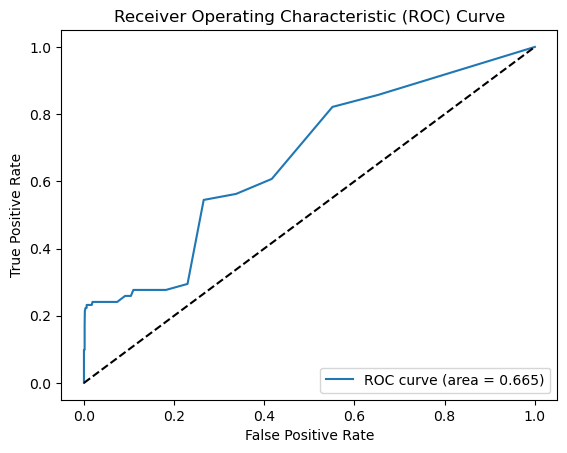

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = clf.predict_proba(X_test_scaled)[:, 1]

# ROC 커브 생성
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC 커브를 그리기 위한 점들을 출력합니다.
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # 기준선 (diagonal)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

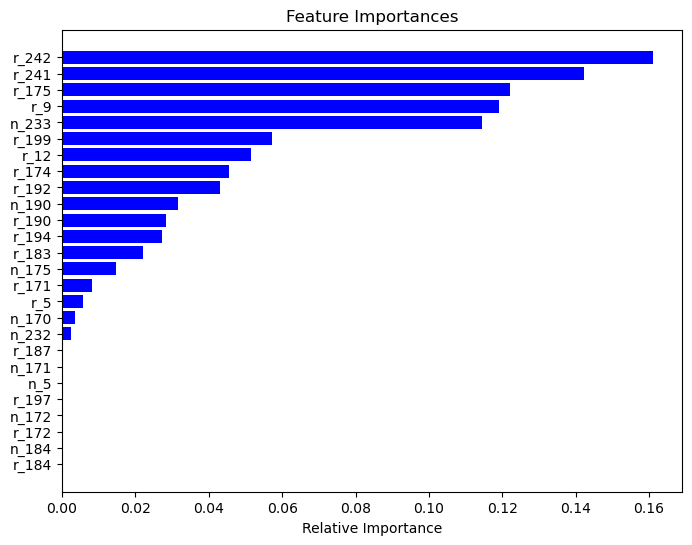

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도
feature_importances = clf.feature_importances_

# 특성 중요도를 내림차순으로 정렬
indices = np.argsort(feature_importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## pycaret

In [26]:
import pandas as pd
from pycaret.classification import *

# 예시 데이터 (시계열 데이터 프레임)

# 데이터를 시간 순서대로 정렬 ('ds' 컬럼을 기준으로)
data = data.sort_values(by='ds')

# 70% 지점의 인덱스를 찾아 훈련 및 테스트 데이터로 분할
index_70_percent = int(len(data) * 0.7)
cutoff_date = data.iloc[index_70_percent]['ds']

# cutoff_date 이전의 데이터는 train_data로, 이후 데이터는 test_data로 분할
train_data = data[data['ds'] <= cutoff_date]
test_data = data[data['ds'] > cutoff_date]

# PyCaret 설정 초기화
# train_data: 사용할 훈련 데이터프레임
# target: 예측하고자 하는 컬럼 이름 (이진 분류의 목표 변수)
s = setup(data=train_data, target='label',fold=5, session_id=123,normalize=True,normalize_method='minmax')

# 모델 비교
# 모든 사용 가능한 모델을 훈련시키고 성능을 비교합니다.
best_model = compare_models()

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Original data shape,"(6993, 29)"
4,Transformed data shape,"(6993, 29)"
5,Transformed train set shape,"(4895, 29)"
6,Transformed test set shape,"(2098, 29)"
7,Numeric features,27
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,0.9994,0.9700,0.9823,0.9758,0.9731,0.9733,0.3980
dt,Decision Tree Classifier,0.9945,0.9881,0.9800,0.9669,0.9733,0.9702,0.9703,0.2120
lightgbm,Light Gradient Boosting Machine,0.9937,0.9991,0.9520,0.9863,0.9682,0.9647,0.9653,0.4940
et,Extra Trees Classifier,0.9914,0.9982,0.9520,0.9645,0.9577,0.9529,0.9533,0.4720
gbc,Gradient Boosting Classifier,0.9708,0.9949,0.7280,0.9824,0.8350,0.8194,0.8312,0.5720
ada,Ada Boost Classifier,0.9371,0.9618,0.4720,0.8465,0.6020,0.5712,0.6019,0.4000
knn,K Neighbors Classifier,0.9342,0.9352,0.6120,0.7054,0.6545,0.6184,0.6208,0.8120
svm,SVM - Linear Kernel,0.9046,0.0000,0.0700,0.9550,0.1300,0.1177,0.2427,0.1720
ridge,Ridge Classifier,0.9042,0.0000,0.0640,0.9818,0.1193,0.1082,0.2342,0.1620
qda,Quadratic Discriminant Analysis,0.9042,0.7986,0.1400,0.6908,0.2255,0.1977,0.2737,0.2200


In [27]:
# 특정 모델 선택 및 훈련
# 예: 로지스틱 회귀 모델
model = create_model('rf')

# 모델 성능 평가 (테스트 데이터로)
predict_model(model, data=test_data)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9959,0.9998,0.9900,0.9706,0.9802,0.9779,0.9780
1,0.9969,1.0000,0.9700,1.0000,0.9848,0.9831,0.9832
2,0.9939,0.9997,0.9400,1.0000,0.9691,0.9657,0.9662
3,0.9939,0.9994,0.9600,0.9796,0.9697,0.9663,0.9663
4,0.9949,0.9982,0.9900,0.9612,0.9754,0.9725,0.9727
Mean,0.9951,0.9994,0.9700,0.9823,0.9758,0.9731,0.9733
Std,0.0012,0.0006,0.0190,0.0156,0.0060,0.0067,0.0066


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9630,0.7357,0.0000,0.0000,0.0000,0.0000,0.0000


,disk_id,ds,n_5,r_5,r_9,r_12,n_170,n_171,r_171,n_172,...,r_199,n_233,r_241,r_242,n_175,r_175,n_232,label,prediction_label,prediction_score
2198,105783,2019-04-24,100.0,0.0,35738.0,14.0,100.0,100.0,0.0,100.0,...,0.0,96.0,548979.0,78414.0,100.0,9.149688e+11,100.0,0,0,1.00
2454,14495,2019-04-24,100.0,0.0,31968.0,14.0,100.0,100.0,0.0,100.0,...,0.0,88.0,4304600.0,79972.0,100.0,8.080683e+11,100.0,0,0,0.96
9832,918,2019-04-24,100.0,0.0,31549.0,22.0,100.0,100.0,0.0,100.0,...,0.0,83.0,5058432.0,1833021.0,100.0,7.992071e+11,100.0,0,0,0.93
7070,84561,2019-04-24,100.0,0.0,31819.0,18.0,100.0,100.0,0.0,100.0,...,25.0,85.0,5219763.0,8174833.0,100.0,8.038054e+11,100.0,0,0,0.96
3578,91796,2019-04-24,100.0,0.0,30157.0,13.0,100.0,100.0,0.0,100.0,...,0.0,96.0,1553295.0,49225.0,100.0,7.688990e+11,100.0,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4888,84725,2019-06-30,100.0,0.0,34634.0,15.0,100.0,100.0,0.0,100.0,...,0.0,99.0,248858.0,66865.0,100.0,8.849905e+11,100.0,0,0,0.98
9038,19792,2019-06-30,100.0,0.0,33569.0,13.0,100.0,100.0,0.0,100.0,...,0.0,89.0,4217199.0,223129.0,100.0,8.507037e+11,100.0,0,0,0.96
9898,918,2019-06-30,100.0,0.0,33150.0,22.0,100.0,100.0,0.0,100.0,...,0.0,82.0,5675654.0,1942245.0,100.0,8.418462e+11,100.0,0,0,0.92
5669,60438,2019-06-30,100.0,0.0,33065.0,23.0,100.0,100.0,0.0,100.0,...,0.0,91.0,4268979.0,2072669.0,100.0,8.290822e+11,100.0,0,0,0.97


In [15]:
tuned_model = tune_model(model)
tuned_model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

In [16]:
# 모델 성능 평가 (테스트 데이터로)
predict_model(tuned_model, data=test_data,)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9683,0.9207,0.5675,0.8796,0.6899,0.6740,0.6920


,disk_id,ds,r_1,n_5,r_5,r_9,r_12,n_171,r_171,n_172,...,n_196,r_196,r_197,r_198,r_199,n_175,r_175,label,prediction_label,prediction_score
52004,18308,2019-04-21,4.294967e+09,98.0,0.0,43119.0,33.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,2.0,100.0,1.091377e+12,0,0,0.9875
29124,15511,2019-04-21,4.294967e+09,95.0,0.0,47266.0,39.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.194210e+12,0,0,1.0000
33715,38847,2019-04-21,2.843350e+09,97.0,0.0,42555.0,34.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.073748e+12,0,0,0.9900
46170,4800,2019-04-21,4.294967e+09,98.0,0.0,40882.0,54.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.026718e+12,1,1,0.6500
1905,42747,2019-04-21,4.294967e+09,97.0,0.0,42999.0,53.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.082371e+12,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47841,6272,2019-06-30,4.294967e+09,96.0,0.0,43145.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.095472e+12,0,0,1.0000
49618,32492,2019-06-30,3.855900e+04,97.0,2.0,45107.0,48.0,100.0,1.0,100.0,...,99.0,2.0,0.0,0.0,0.0,100.0,1.134152e+12,0,0,0.9800
39278,40080,2019-06-30,4.294967e+09,96.0,0.0,41793.0,27.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.069601e+12,0,0,1.0000
37642,35986,2019-06-30,4.294967e+09,97.0,0.0,41898.0,29.0,100.0,0.0,100.0,...,100.0,0.0,0.0,0.0,0.0,100.0,1.065432e+12,0,0,0.9500
